In [20]:
import pandas as pd
import numpy as np

In [26]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv("UCI_Credit_Card.csv",dtype = np.int) #TODO

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [28]:
df.info()
print("number on null values: \n{}\n".format(df.isnull().sum()))
print("Mean age is: {0:.2f}\n".format(df['AGE'].mean()))
print("Counts of people with different education level:")
print(df["EDUCATION"].value_counts())
print("\nmax LIMIT_BAL: {}".format(df["LIMIT_BAL"].max()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int32
LIMIT_BAL                     30000 non-null int32
SEX                           30000 non-null int32
EDUCATION                     30000 non-null int32
MARRIAGE                      30000 non-null int32
AGE                           30000 non-null int32
PAY_0                         30000 non-null int32
PAY_2                         30000 non-null int32
PAY_3                         30000 non-null int32
PAY_4                         30000 non-null int32
PAY_5                         30000 non-null int32
PAY_6                         30000 non-null int32
BILL_AMT1                     30000 non-null int32
BILL_AMT2                     30000 non-null int32
BILL_AMT3                     30000 non-null int32
BILL_AMT4                     30000 non-null int32
BILL_AMT5                     30000 non-null int32
BILL_AMT6               

In [49]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 


df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].shape[0]

8656

In [69]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
bill_pay_cols=[x for x in df.columns if ((x.startswith('BILL_')) or (x.startswith('PAY_')))]
bill_pay_cols.append('default.payment.next.month')
df[bill_pay_cols].groupby('default.payment.next.month').median()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [90]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(values='ID',index='EDUCATION',columns=['SEX','MARRIAGE'],aggfunc='count') #TODO

SEX           1                           2                      
MARRIAGE      0       1       2     3     0       1       2     3
EDUCATION                                                        
0           NaN     2.0     6.0   NaN   NaN     2.0     4.0   NaN
1           1.0  1690.0  2633.0  30.0   3.0  2032.0  4176.0  20.0
2           1.0  2370.0  2940.0  63.0   5.0  4472.0  4080.0  99.0
3          12.0  1048.0   894.0  36.0  32.0  1813.0  1015.0  67.0
4           NaN    18.0    23.0   1.0   NaN    34.0    45.0   2.0
5           NaN    48.0    46.0   1.0   NaN   102.0    81.0   2.0
6           NaN    14.0    11.0   NaN   NaN    14.0    10.0   2.0

In [95]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000
def lb_class(x):
    if (x <= 10000):
        return('A')
    elif (x <= 100000):
        return('B')
    elif (x <= 200000):
        return('C')
    elif (x <= 400000):
        return('D')
    elif (x <= 700000):
        return('E')
    else:
        return('F')
    
df['LB_CLASS'] = df['LIMIT_BAL'].map(lb_class)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LB_CLASS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,B
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,C
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,B
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,B
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,B


In [105]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

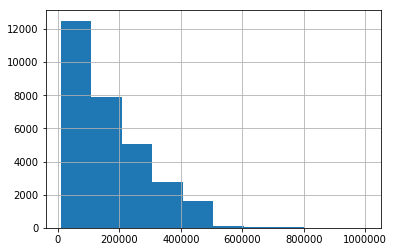

In [97]:
df['LIMIT_BAL'].hist() #TODO

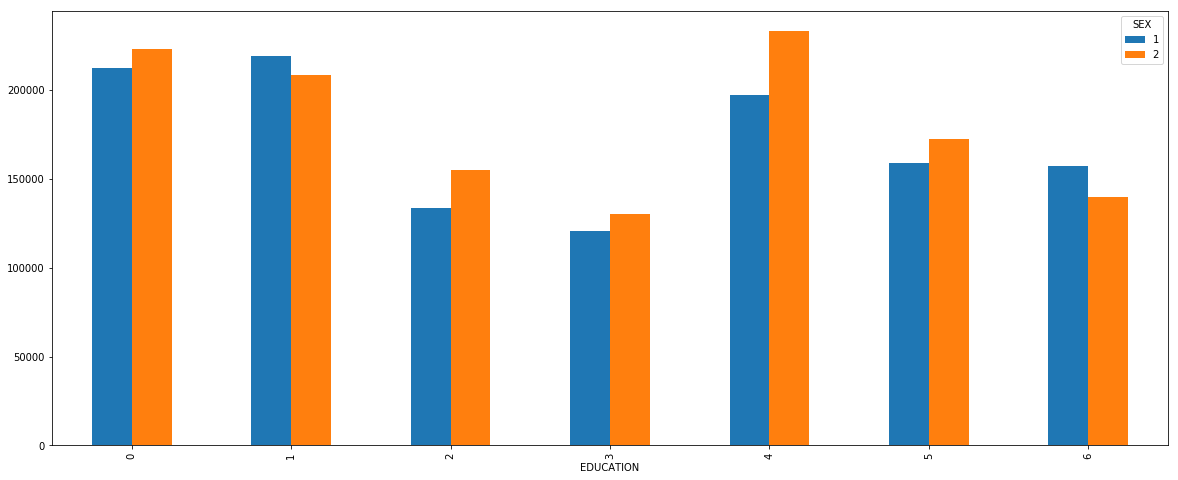

In [108]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)

_, ax = plt.subplots(figsize=(20,8))

df.pivot_table(values='LIMIT_BAL', index='EDUCATION', columns='SEX', aggfunc='mean').plot(
    kind='bar', ax=ax
)
plt.show()



In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO